### Notebook to create some plots to compare CMIP6 results to observational results

In [1]:
import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Comparison/code')

import import_data as imprt
import figures as figs

import matplotlib.pyplot as plt

In [3]:
# Import regression results

results_np_era5, results_tim_era5, results_dang_era5 = imprt.import_reg_results('results', 'era5')
timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5 = imprt.import_reg_results('timeseries', 'era5')

results_np_20cr, results_tim_20cr, results_dang_20cr = imprt.import_reg_results('results', '20cr')
timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr = imprt.import_reg_results('timeseries', '20cr')

results_np_hist, results_tim_hist, results_dang_hist = imprt.import_reg_results('results', 'historical')
timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist = imprt.import_reg_results('timeseries', 'historical')

In [36]:
results_np_era5['R$^2_{wind}$']['Average']

0.1948132542209123

In [31]:
results_np_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.909907,0.167629,0.157040,1.095948e-07,2.647606,-5.663606,1.442938,-0.520298,11.346121
Hoek v. Holland,0.931613,0.200370,0.194841,2.488180e-03,2.500945,-4.055133,1.927236,-0.207581,12.229507
Den Helder,0.860689,0.354057,0.350760,1.550318e-03,2.484439,-2.731276,2.233327,-0.199408,7.243911
Delfzijl,0.892861,0.348587,0.347637,6.145040e-03,2.736412,-4.266657,2.745335,0.195941,9.367838
Harlingen,0.842974,0.435231,0.436653,1.169982e-02,2.479065,-2.192713,2.661063,0.148255,6.097163
IJmuiden,0.880525,0.188852,0.184181,2.589863e-03,3.045302,-5.698098,1.718796,-0.164290,10.955796
Average,0.928553,0.290750,0.288148,3.120975e-03,2.103832,-4.094299,2.131394,-0.134289,9.522055


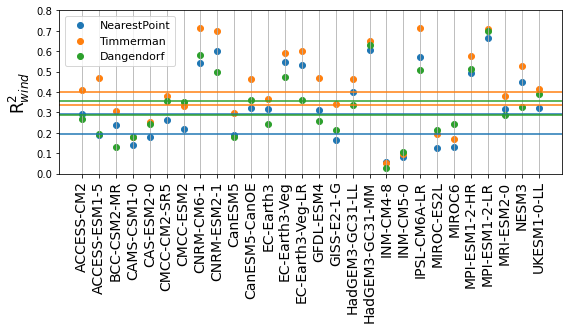

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (9,3))
plt.scatter(results_np_hist.model.values, results_np_hist.r2_wind.sel(station='Average').values, label = 'NearestPoint')
plt.scatter(results_tim_hist.model.values, results_tim_hist.r2_wind.sel(station='Average').values, label = 'Timmerman')
plt.scatter(results_dang_hist.model.values, results_dang_hist.r2_wind.sel(station='Average').values, label = 'Dangendorf')


plt.ylabel('R$^2_{wind}$', size = 17)
plt.ylim(0,0.8)
plt.xticks(rotation=90, size = 14)
plt.grid(axis='x')
plt.legend(fontsize = 11)

plt.axhline(y=results_np_era5['R$^2_{wind}$']['Average'], color="tab:blue")
plt.axhline(y=results_np_20cr['R$^2_{wind}$']['Average'], color="tab:blue")
plt.axhline(y=results_tim_era5['R$^2_{wind}$']['Average'], color="tab:orange")
plt.axhline(y=results_tim_20cr['R$^2_{wind}$']['Average'], color="tab:orange")
plt.axhline(y=results_dang_era5['R$^2_{wind}$']['Average'], color="tab:green")
plt.axhline(y=results_dang_20cr['R$^2_{wind}$']['Average'], color="tab:green")




plt.show()

In [89]:
def var_plot(results_hist, results_era5, results_20cr, name, model, ymin = 0, ymax = 0.8):



    fig, ax1 = plt.subplots(figsize = (9,2))
    plt.scatter(results_hist.model.values, results_hist.values)

    plt.ylabel(name, size = 17)
    plt.ylim(ymin,ymax)
    plt.xticks(rotation=90, size = 14)
    plt.grid(axis='x')
    plt.axhspan(results_era5, results_20cr, facecolor='tab:blue', alpha=0.15)
    plt.axhline(y=results_era5, color="tab:blue")
    plt.axhline(y=results_20cr, color="tab:blue")
    
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/fullperiod/cmip6/{name}_{model}_obs_cmip6',
               dpi = 500, bbox_inches = 'tight')
    
    plt.title(model)

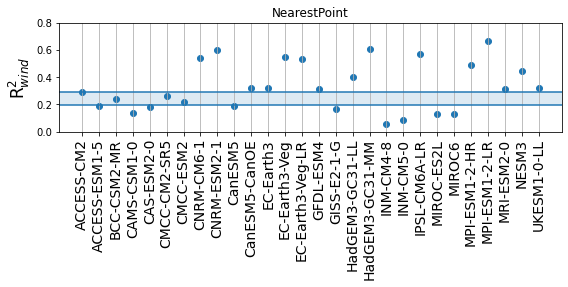

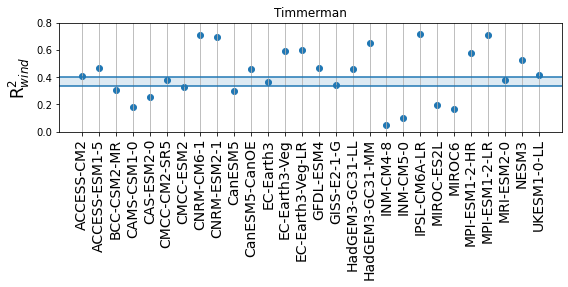

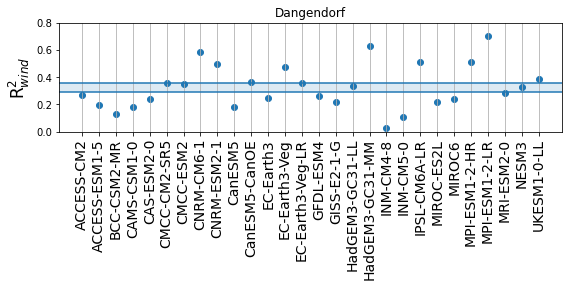

In [75]:
var_plot(results_np_hist.r2_wind.sel(station='Average'), 
         results_np_era5['R$^2_{wind}$']['Average'], 
         results_np_20cr['R$^2_{wind}$']['Average'],
         'R$^2_{wind}$', 'NearestPoint',)

var_plot(results_tim_hist.r2_wind.sel(station='Average'), 
         results_tim_era5['R$^2_{wind}$']['Average'], 
         results_tim_20cr['R$^2_{wind}$']['Average'],
         'R$^2_{wind}$', 'Timmerman',)

var_plot(results_dang_hist.r2_wind.sel(station='Average'), 
         results_dang_era5['R$^2_{wind}$']['Average'], 
         results_dang_20cr['R$^2_{wind}$']['Average'],
         'R$^2_{wind}$', 'Dangendorf',)

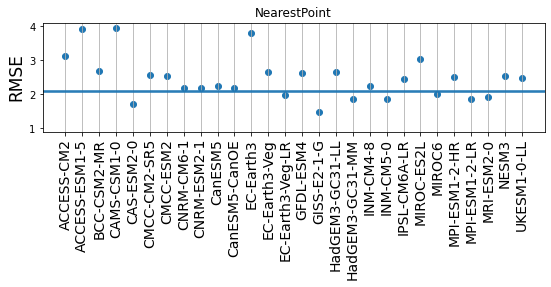

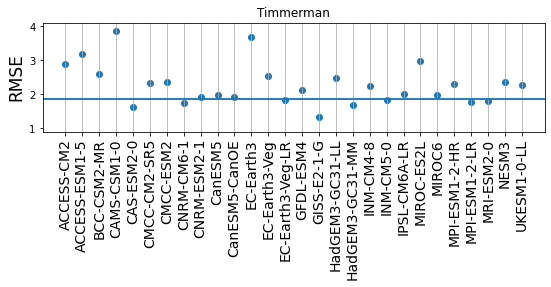

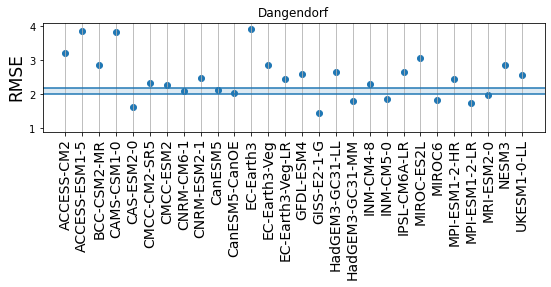

In [90]:
var_plot(results_np_hist.rmse.sel(station='Average'), 
         results_np_era5['RMSE']['Average'], 
         results_np_20cr['RMSE']['Average'],
         'RMSE', 'NearestPoint', ymin = 0.9, ymax = 4.1)

var_plot(results_tim_hist.rmse.sel(station='Average'), 
         results_tim_era5['RMSE']['Average'], 
         results_tim_20cr['RMSE']['Average'],
         'RMSE', 'Timmerman', ymin = 0.9, ymax = 4.1)

var_plot(results_dang_hist.rmse.sel(station='Average'), 
         results_dang_era5['RMSE']['Average'], 
         results_dang_20cr['RMSE']['Average'],
         'RMSE', 'Dangendorf', ymin = 0.9, ymax = 4.1)

In [111]:
def var_plots(results_hist, results_era5, results_20cr, name, ymin = 0, ymax = 0.8):



    fig, axes = plt.subplots(3,1, figsize = (9,7.5), sharex = True)
    
    names = ['NearestPoint', 'Timmerman', 'Dangendorf']
    
    for k in range(3):
        
        ax = axes[k]
        
        ax.scatter(results_hist[k].model.values, results_hist[k].values)
    

        ax.set_ylabel(name, size = 17)
        ax.set_ylim(ymin,ymax)
        plt.xticks(rotation=90, size = 14)
        ax.grid(axis='x')
        ax.axhspan(results_era5[k], results_20cr[k], facecolor='tab:blue', alpha=0.15)
        ax.axhline(y=results_era5[k], color="tab:blue")
        ax.axhline(y=results_20cr[k], color="tab:blue")
        
        ax.set_title(names[k], size = 14)
        
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/fullperiod/cmip6/{name}_obs_cmip6',
               dpi = 500, bbox_inches = 'tight')
    
    

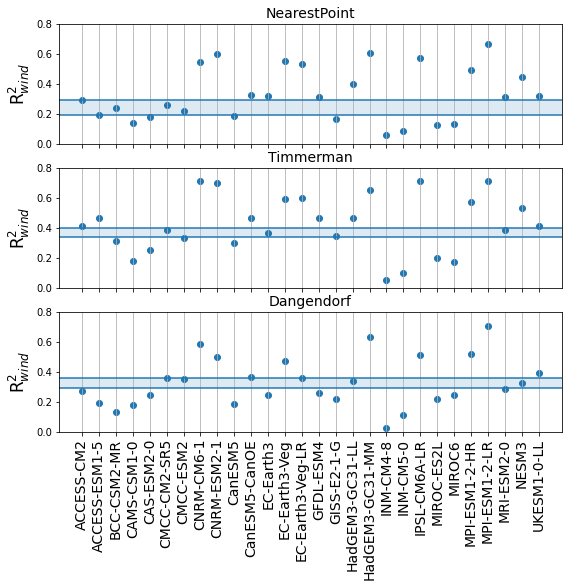

In [107]:
results_hist = [results_np_hist.r2_wind.sel(station='Average'), 
                results_tim_hist.r2_wind.sel(station='Average'), 
                results_dang_hist.r2_wind.sel(station='Average')]

results_era5 = [results_np_era5['R$^2_{wind}$']['Average'], 
                results_tim_era5['R$^2_{wind}$']['Average'], 
                results_dang_era5['R$^2_{wind}$']['Average']]

results_20cr = [results_np_20cr['R$^2_{wind}$']['Average'], 
                results_tim_20cr['R$^2_{wind}$']['Average'], 
                results_dang_20cr['R$^2_{wind}$']['Average']]

var_plots(results_hist, results_era5, results_20cr, 'R$^2_{wind}$')

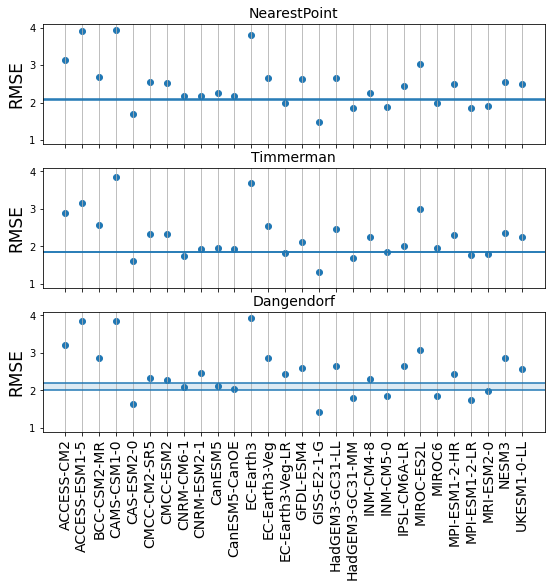

In [112]:
results_hist = [results_np_hist.rmse.sel(station='Average'), 
                results_tim_hist.rmse.sel(station='Average'), 
                results_dang_hist.rmse.sel(station='Average')]

results_era5 = [results_np_era5['RMSE']['Average'], 
                results_tim_era5['RMSE']['Average'], 
                results_dang_era5['RMSE']['Average']]

results_20cr = [results_np_20cr['RMSE']['Average'], 
                results_tim_20cr['RMSE']['Average'], 
                results_dang_20cr['RMSE']['Average']]

var_plots(results_hist, results_era5, results_20cr, 'RMSE', ymin = 0.9, ymax = 4.1)

In [ ]:
timeseries_np_hist, timeseries_tim_hist, timeseries_dang_hist

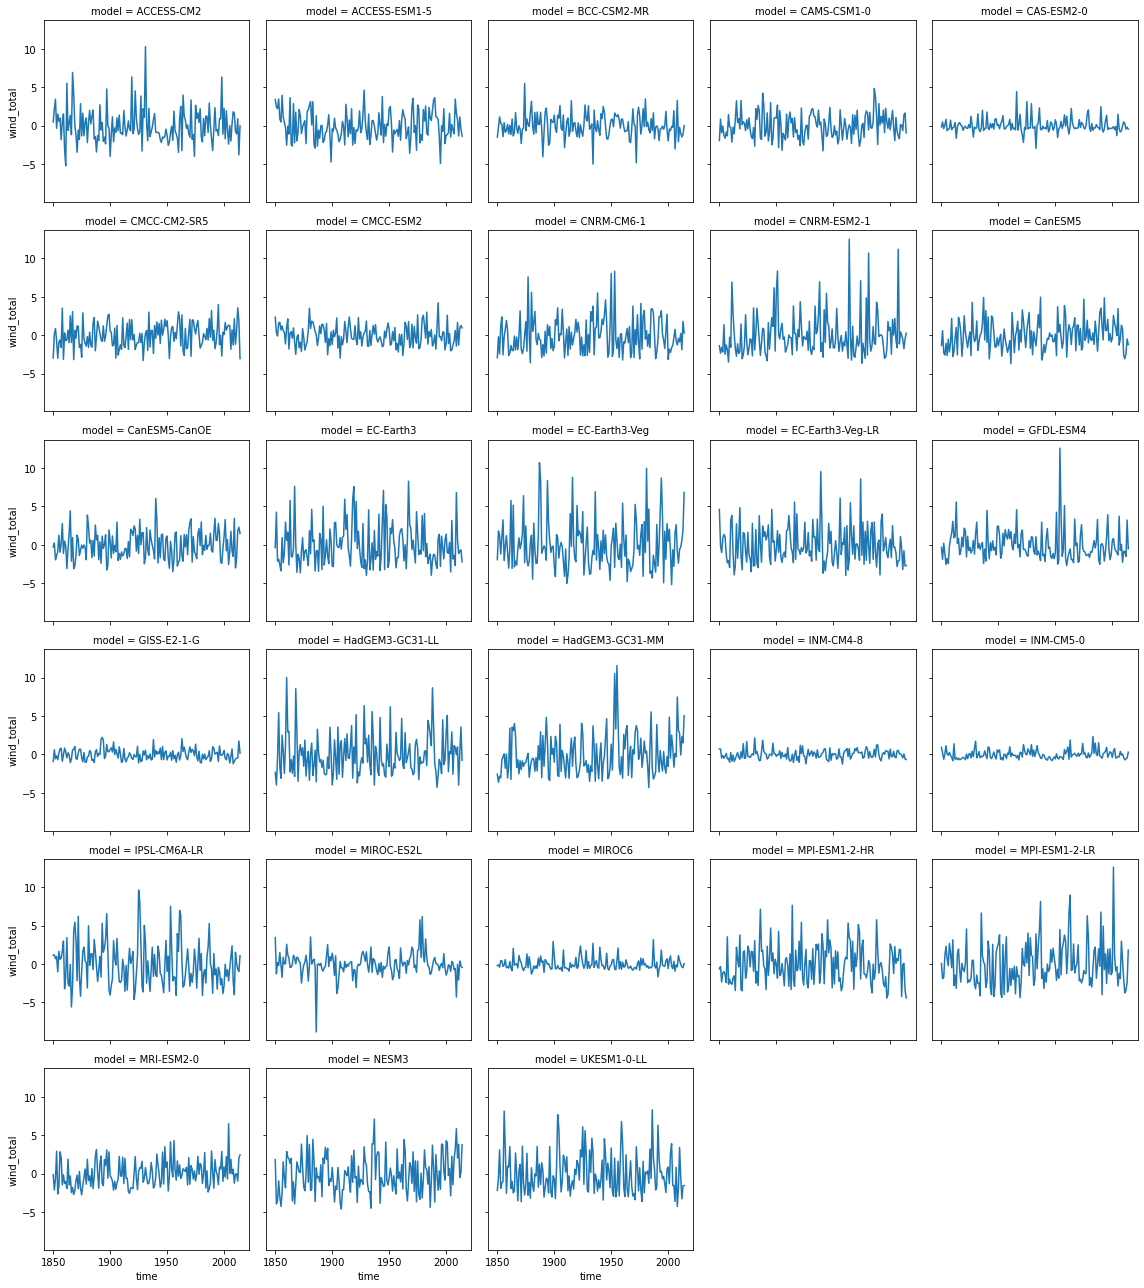

In [115]:
timeseries_np_hist.wind_total.sel(station = 'Average').plot(col = 'model', col_wrap=5)